# Image Classification with TensorFlow (MNIST & Fashion MNIST)

## Importing Libraries

In [337]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## TensorFlow Built-in Datasets
The keras.datasets module provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples.

In [340]:
import tensorflow.keras.datasets as datasets
pprint(dir(datasets))

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']


TensorFlow Datasets has larger & more useful ready-to-use datasets.

In [343]:
import tensorflow_datasets as tfds
datasets_list = tfds.list_builders()
pprint(datasets_list)

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

## MNIST DATASET

#### Load and Normalize the MNIST dataset

In [347]:
# Loading the dataset from Keras Datasets
mnist = tf.keras.datasets.mnist
print(mnist)

<module 'keras.api.datasets.mnist' from 'C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>


In [349]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'Training Image Shape: {x_train.shape}')
print(f'Training Label Shape: {y_train.shape}')
print(f'Testing Image Shape: {x_test.shape}')
print(f'Testing Label Shape: {y_test.shape}')

Training Image Shape: (60000, 28, 28)
Training Label Shape: (60000,)
Testing Image Shape: (10000, 28, 28)
Testing Label Shape: (10000,)


LABEL: 5

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

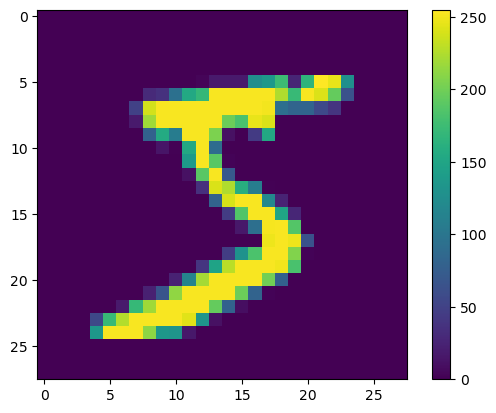

In [351]:
print(f'LABEL: {y_train[0]}')
print(f'\nIMAGE PIXEL ARRAY:\n\n{x_train[0]}\n\n')

plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [352]:
# Normalize the pixel values
x_train = x_train / 255.0

#### Create and Compile Model

In [356]:
def create_and_compile_model():
    model = tf.keras.models.Sequential([ 
		tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512 , activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10 , activation=tf.nn.softmax)
    ]) 
    
    # Compile the model
    model.compile(
		optimizer='adam',
		loss='sparse_categorical_crossentropy',
		metrics=['accuracy']
	)

    return model

#### Create a Callback class


In [359]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        
        # Check if the accuracy is greater or equal to 0.98
        if logs['accuracy'] >= 0.98:
                            
            # Stop training once the above condition is met
            self.model.stop_training = True

            print("\nReached 98% accuracy so cancelling training!") 


#### Train MNIST

In [362]:
model = create_and_compile_model()
history = model.fit(x_train, y_train, epochs=10, callbacks=[EarlyStoppingCallback()])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9006 - loss: 0.3377
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9744 - loss: 0.0826
Epoch 3/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9849 - loss: 0.0501
Reached 98% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9849 - loss: 0.0501


### FASHION MNIST DATASET

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [365]:
fmnist = tf.keras.datasets.fashion_mnist
print(fmnist)

<module 'keras.api.datasets.fashion_mnist' from 'C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\fashion_mnist\\__init__.py'>


Calling load_data() on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.

In [367]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
print(f'Training Image Shape: {training_images.shape}')
print(f'Training Label Shape: {training_labels.shape}')
print(f'Testing Image Shape: {test_images.shape}')
print(f'Testing Label Shape: {test_labels.shape}')

Training Image Shape: (60000, 28, 28)
Training Label Shape: (60000,)
Testing Image Shape: (10000, 28, 28)
Testing Label Shape: (10000,)


LABEL: 9

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

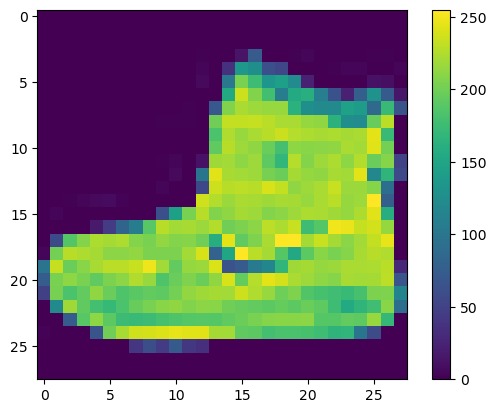

In [368]:
print(f'LABEL: {training_labels[0]}')
print(f'\nIMAGE PIXEL ARRAY:\n\n{training_images[0]}\n\n')

plt.imshow(training_images[index])
plt.colorbar()
plt.show()

In [369]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [370]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [371]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7914 - loss: 0.5871
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8682 - loss: 0.3638
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8808 - loss: 0.3224
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8868 - loss: 0.3008
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8966 - loss: 0.2771
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8986 - loss: 0.2641
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9071 - loss: 0.2502
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9103 - loss: 0.2389
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9132 - loss: 0.2289
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9173 - loss: 0.2181


#### Convolutional Neural Networks (CNNs)

In [373]:
model = tf.keras.models.Sequential([
                                                         
    # Add convolutions and max pooling
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=10)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)


MODEL TRAINING:
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 30ms/step - accuracy: 0.7766 - loss: 0.6040
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8879 - loss: 0.3038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9063 - loss: 0.2531
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9170 - loss: 0.2207
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9292 - loss: 0.1907
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9395 - loss: 0.1653
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9449 - loss: 0.1481
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9515 - loss: 0.1272
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9584 - loss: 0.1100
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9634 - loss: 0.0959


#### Model Evaluation

In [375]:
# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')


MODEL EVALUATION:
test set accuracy: 0.909600019454956
test set loss: 0.28917649388313293
